In [1]:
# expand the cell width to 100% of the content
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Aufgabenstellung

Wir haben uns für Thema 2 - Chaos entschieden.  
Es umfasst folgende sechs Unterthemen:
- Logistische Gleichung
- Feigenbaum-Diagramm
- Sensitivität
- Julia-Mengen
- Mandelbrotmenge
- Apfelmännchen und Selbstähnlichkeit

Zu jedem Thema soll eine Erklärung, eine Art kurzer Wiki-Eintrag verfasst werden, die dem Leser einen groben Überblick über das Thema vermittelt.  
Außerdem sollen die Sachverhalte wo möglich durch entsprechende Visualisierungen veranschaulicht werden. Dazu stellt Sage bereits einige Methoden zur Verfügung, insbesondere zur Darstellung von Julia- und Mandelbrotmengen. Da die Aufgabenstellung aber eigene Implementationen fordert, nutzen wir diese nicht sondern haben selbst exemplarische Lösungen gefunden.


# Implementierung

## Logistische Gleichung

Die logistische Gleichung ist eine relativ einfache, nichtlineare Gleichung, die sich im Gegensatz zu den uns bisher bekannten linearen Gleichungen für bestimmte Parameter scheinbar unvorhersehbar und chaotisch verhält.  
Sie ist rekursiv definiert durch die folgende Gleichung:  
<p style="text-align: center; font-size: 20px;">
<b> x<sub>n+1</sub> = r * x<sub>n</sub> * (1 - x<sub>n</sub>) </b> </p>  
    
### Populationsmodellierung durch exponentielles Wachstum
Die logistische Gleichung wurde 1845 von Pierre-François Verhulst, einem belgischen Mathematiker, zur Modellierung von Populationen entwickelt.  
Der damals übliche Ansatz dafür war, die Population durch eine exponentiell wachsende Funktion x<sub>n+1</sub> = r * x<sub>n</sub> zu modellieren.  
x<sub>n</sub> ist dabei die Größe der Population zum Zeitpunkt n, r eine Spezies-spezifische Wachstumsrate (i.d.R. > 1, sonst würde die Spezies einfach aussterben).  

Dies lässt sich zu Beginn so auch in der Realität beobachten, beispielsweise bei der Vermehrung von Zellen oder dem Wachstum von Pilzen.  
Eine Zelle teilt sich, man bekommt nach einem Zeitintervall zwei, nach zwei Intervallen vier, nach drei Intervallen acht Zellen und so weiter. In diesem Beispiel wäre also r = 2.
Auch für Tiere und Menschen scheint dies intuitiv: Je dichter ein gegebener Lebensraum mit einer Spezies besiedelt ist, desto höher ist auch die Wahrscheinlichkeit, dass sich zwei paarungswillige und -fähige Individuen treffen und sich vermehren.  

Allerdings ist auch offensichtlich, dass diese Modellierung nicht die gesamte Entwicklung beschreiben kann:  
Die Funktion wächst exponentiell und wird somit irgendwann sehr schnell unendlich groß, wohingegen die Population einer Spezies in der Realität begrenzt ist. Irgendwann reichen beispielsweise die vorhandenen Ressourcen im Lebensraum (Platz, Nahrung) nicht mehr für alle aus, wodurch die Sterblichkeit steigt und so die effektive Wachstumsrate (Geburtenrate - Sterberate) abfällt. Die Population wächst dann langsamer oder schrumpft sogar. Diese äußeren Einflüsse fasst man in der *Kapazität K* eines Lebensraums zusammen. Sie beschreibt die maximale Größe einer Population in diesem Lebensraum.

### Ergänzung durch wachstumshemmende Terme
Verhulst erkannte dieses Problem und löste es, indem er neben dem wachstumstreibenden Term x<sub>n</sub> noch einen wachstumshemmenden in die Gleichung einbaute.  
Beschreibt die Kapazität K wie oben definiert die maximale Individuenanzahl, so muss die Population umso langsamer wachsen, je näher sich ihre Größe schon an die Kapazität angenähert hat.  
Dies erreicht man zum Beispiel durch das Hinzufügen des Faktors (K - x<sub>n</sub>). Nun liefert diese Differenz aber Faktoren im Intervall [0, K], also auch solche > 1, die das Wachstum weiter steigern statt es zu hemmen. Man teilt also nochmal durch K, um als Bildbereich das Intervall [0, 1] zu erhalten: (1 - x<sub>n</sub> / K). Dadurch entsteht die logistische Gleichung x<sub>n+1</sub> = r * x<sub>n</sub> * (1 - x<sub>n</sub> / K).  
K wird in der Regel einfach weggelassen beziehungsweise K = 1 gesetzt.  
Auch die nachfolgende Simulation betrachtet die Gleichung wie zu Beginn notiert ohne Betrachtung einer spezifischen Kapazität.
In ihr erkennt man gut, dass sich die Populationsgröße für 1 < r < 3 fast immer irgendwann stabilisiert.  
Für r <= 1 stirbt die Population aus, für r >= 3 schwingt die Gleichung jedoch oder wird sogar - wie eingangs erwähnt - scheinbar unvorhersehbar chaotisch.


In [2]:
var('r', 'x')
log_equation(r, x) = r * x * (1 - x)
    
@interact
def plot_le(x0 = slider(0, 1, default=0.5, step_size=0.1, label="Startwert x<sub>0</sub>"), 
            r  = slider(0, 4, default=3.8, step_size=0.1, label="Wachstum r"),
            darstellung = selector(['Punkte', 'Kurve'], label="Darstellung", default='Kurve')):
    """Plottet interaktiv die logistische Gleichung als Kurve oder diskrete Punkte"""
    x = x0
    p = [(0, x)]
    for i in range(1, 100):
        x = log_equation(r, x)
        p += [(i, x)]
    result = line(p) if darstellung == 'Kurve' else points(p)

    result.show(figsize=10, ymin=0, ymax=1, axes_labels=['$n$','$X$'])

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIHBsb3RfbGUgYXQgMHg2ZmZjZGE5MjE1ZjA+IHdpdGggMyB3aWRnZXRzCiAgeDA6IFRyYW5zZm9ybUZsb2F0U2xpZGVyKHZhbHVlPTAuNSzigKY=


## Feigenbaum Diagramm

Das Feigenbaumdiagramm ist ein nach dem US-amerikanischen Physiker Mitchell Feigenbaum benanntes Diagramm, welches nichtlineare Systeme, wie z.B. die eben beschriebene logistische Gleichung, visualisiert.

Im Folgenden sieht man eine Implementierung für das Feigenbaumdiagramm der logistischen Gleichung. <br>
Zur Berechnung werden die spezifizierte Nummer an Punkten mit zufälligen x- und r-Werten im Gesammten Bereich generiert. Danach wird die logistische Gleichung N-mal auf jeden Punkt andewandt und die Punkte anschließend in der Form (r,x<sub>N</sub>) geplottet. <br>
Über die Regler lassen sich einige Werte, wie die Anzahl der Punkte, Iterationen pro Punkt oder der betrachtete R-Bereich individuell einstellen.<br>
Den R<sub>Min</sub>-Wert größer als R<sub>Max</sub> zu wählen ist logisch unsinnig und erzeugt demnach kein Diagramm.

Der Focus<sub>Points</sub> Wert gibt an, welcher Anteil der zufällig generierten Punkte in dem Segment ab 2,5 liegen (z.B. Focus<sub>Points</sub> = 2 --> 1/3 der Punkte zwischen 0 und 2,5, 2/3 zwischen 2,5 und 4). Ist der Wert 0, so werden alle Punkte gleichwertig generiert. 
Um kleinere Änderungen Vorzunehmen können sie einen Schieber eines Reglers selektieren und mit den Pfeiltasten anpassen.
<br>Um größere Änderungen Vorzunehmen klicken sie bitte auf den Regler an der gewünschten Stelle, anstatt den Schieber zu verschieben.
<br>Bei einer hohen Zahl an Punkten oder Iterationen kann es etwas dauern, bis das eingestellte Diagramm erstellt wurde.

In [7]:
from IPython.display import clear_output

@interact
def plot_fig(NumPoints = slider(1, 50000, default=500, step_size=1, label="Num<sub>Points</sub>"),
             focus = slider(1, 50, default=0, step_size=1, label="Focus<sub>Points</sub>"),
             N = slider(0, 500, default=5, step_size=1, label="N<sub>Iterations</sub>"),
             rMin = slider(0.00, 4, default=0, step_size=0.1, label="R<sub>Min</sub>"),
             dotSize = slider(1, 50, default=1, step_size=1, label="Size<sub>Dot</sub>"),
             auto_update = false):
    
    p = []
    rMax = 4
    for i in range(0, NumPoints):
        if focus != 0:
            if (i < (NumPoints / (focus + 1)) * focus):
                p += [(uniform(2.5,rMax),random())]
            else:
                p += [(uniform(0,2.5),random())]
        else:
            p += [(uniform(0,rMax),random())]
    #p = list(filter(lambda x: x[0] > rMin, p))
    for i in range(len(p)):
        for n in range(N):
            # Aus performance-technischen Gründen wird hier direkt die Formel und nicht die Funktion von oben benutzt
            # Refactored: Verwendung einer Sage Funktion statt einer Klasse für log_equation, jetzt einheitliche Nutzung der log_equation
            
            # Punkt = (r, xN)
            p[i] = (p[i][0], log_equation(p[i][0], p[i][1])) 
            # p[i] = (p[i][0], p[i][0] * p[i][1] * (1 - p[i][1]))
        clear_output(wait=True)
        print("Fortschritt:")
        print(float(i + 1) / float(len(p)) * 100)
            
    #print(len(ps))
    show(points(p, size=dotSize), axes_labels=['$R-Value$','$X-Value$'], figsize=8, ymin=0, ymax=1, xmin=rMin, xmax=rMax)

TWFudWFsIGludGVyYWN0aXZlIGZ1bmN0aW9uIDxmdW5jdGlvbiBwbG90X2ZpZyBhdCAweDZmZmNkODYzOGY1MD4gd2l0aCA1IHdpZGdldHMKICBOdW1Qb2ludHM6IFRyYW5zZm9ybUludFNsaWTigKY=


### Feigenbaum-Konstante
Mit höheren Iterationsstufen ist hier nun das klassische Feigenbaum-Verhalten immer besser zu erkennen. Die X-Werte der einzelnen Punkte streben schlussendlich immer zu einem (bei höherem R zu mehreren) Fixpunkt. Die Kurve dieser Fixpunkte liegt bei R-Werten unter 1,0 bei 0 (logisch: Wachstum unter 1,0 --> Schrumpfen). Die nun folgende Kurve spaltet sich ab einem gewissen R-Wert auf und beginnt zwischen beiden Teilen zu osziliieren. Jeder dieser Teile spaltet sich nun wieder und wieder und wieder... Diese Punkte der Abspaltung werden als Bifurkationspunkte bezeichnet. Der Graph wirkt zunächst noch recht geordnet, allerdings verkürzt sich die Spanne zwischen den Bifurkationspunkten immer weiter (immer ca. 4,66 mal kurzer als das Vorgängerintervall), bis die Kurve schlussendlich wieder Chaotisch wird.

Feigenbaum hat hierzu nun nachgewiesen, dass in diesem nun chaotischen Verhalten doch wieder Ordnung zu finden ist.
1978 veröffentlichte er die sog. (erste) Feigenbaumkonstante. Diese beschreibt genau den Faktor, mit dem die Abstände zwischen den Bifuraktionspunkten abnehmen. Dabei ist sie nicht exclusiv für die logistische gleichung, sondern universell für eine ganze Gattung an Gleichungen mit chaotisch-sensitivem Verhalten.
Die Feigenbaumkonstante ist heute auf 1018 Nachkommastellen bekannt und liegt bei etwa 4,669

## Sensitivität

Die Sensitivität eines Systems ist grundlegend die Abhägigkeit dessen von seinen Anfangsparametern. Bei sensitiven Systemen genügen sehr kleine Abweichungen von diesem Anfangszustand um völlig unterschiedliche Verläufe auszulösen.

Ist möglich Regeln zu definieren um den Verlauf zu beschreiben, so spricht man von deterministischem Chaos. Auch bei chaotisch anmutenden Begebenheiten liegen dem deterministischen Chaos immer Regeln zugrunde, mit denen sich das sensitive System beschreiben und voraussagen ließe, würde man es komplett überblicken.

Im Gegenzug dazu gibt es noch vorgänge, welche sich nicht klar durch Regeln beschreiben lassen. Im Fall von quantenmechanischen Prozessen können keine Regelun gefunden werden, da nach heutigem Stand der Wissenschaft quanten sich echt unvorhersehbar verhalten. Wenn ein System nun auf diese quantenmechanischen Prozesse hin sensitiv ist, so lässt sich dessen Verlauf in keinem Fall vorhersagen.

Die bereits beschriebene Logistische Gleichung ist ein Beispiel für eine anfangsbedingungs-sensitive Gleichung.

### Schmetterlingseffekt

Der Schmetterlingseffekt ist wohl der bekanntesten Effekte dem die Sensitivität der Anfangsbedingungen zu Grunde liegt. 
Der Metereologe Edward Norton Lorenz entdeckte das Phänomen 1961, als er Berechnungen zu einem Wettermodell durchführte. Hierbei setzte er verschiedene Wetterparameter un Verbindung und ließ sein Modell mehrere Male berechnen, wobei er jedoch völlig unterschiedliche Ergebnisse erhielt. Dies geschah, weil er bei der erneuten Berechnung Zwischenergebnisse der Ersten verwendete, welche gerundet und weniger genau waren. 



## Julia-Mengen

Definition der ausgefüllten Julia-Menge K des Polynoms f: ℂ → ℂ:
<p style="text-align: center; font-size: 20px;">
<b> K(f) ≔ {z ∈ ℂ | lim<sub>k → ∞</sub> | f<sup>k</sup> (z) | ≠ ∞} </b> </p>  

f<sup>k</sup> ist dabei die k-fache Komposition beziehungsweise Hintereinanderausführung von f. f<sup>2</sup>(x) wäre beispielweise gleich f(f(x)).   
Die ausgefüllte Julia Menge einer Funktion f enthält also alle diejenigen Zahlen z ∈ ℂ, für die die Folge Z<sub>n + 1</sub> = f(Z<sub>n</sub>) mit z als Startwert Z<sub>0</sub> nicht gegen Unendlich strebt, sondern konvergiert.  
Sie kann analog auch über anderen Körpern, beispielsweise den reellen Zahlen, definiert werden. Üblicherweise betrachtet man aber die komplexen Zahlen und wir beschränken uns im Nachfolgenden auch auf diese.
Die Julia Menge ist definiert als Rand der ausgefüllten Julia Menge, oft wird aber auch die gesamte Menge so bezeichnet.

Für viele Funktionen lässt sich vorhersagen, wie sich diese verhalten, wenn man sie wiederholt auf einen Startwert anwendet. Beispielsweise konvergiert f(x) = x / 2 unabhängig vom Startwert gegen 0, f(x) = √x konvergiert für x > 0 gegen 1.  
f(x) = x<sup>2</sup> läuft für alle x mit |x| > 1 gegen +∞, für solche mit 0 < |x| < 1 gegen 0. Besonders sind dabei 0 und 1: Siese sind sogenannte Fixpunkte der Funktion, für die gilt: f(x) = x.
Besonders interessant ist die Julia Menge jedoch für Funktionen, bei denen dieses Verhalten nicht so leicht vorhersehbar ist. Ein populäres Beispiel, auf das die Julia Menge oft angewandt wird, ist die komplexe Funktion *Z<sub>n + 1</sub> = Z<sub>n</sub><sup>2</sup> + c*. Z<sub>n</sub> ist die Laufvariable, c ein beliebig gewählter, komplexer Parameter. 

### Visualisierung

Für komplexe Funktionen kann man die Julia-Menge auf der Gaußschen Zahlenebene darstellen, was für "chaotische" Funktionen wie die obige zu optisch ansprechenden Fraktalen führt, die ihren Teil zur Popularität und Bekanntheit des Problems beigetragen haben dürften. Zahlen, die Element der Julia-Menge sind, werden dabei farbig vom Rest der Zahlenebene abgesetzt. Zusätzlich kann man die nicht zur Julia Menge gehörigen Pixel farblich danach abstufen, wieviele Iterationen nötig waren, um ihre Divergenz festzustellen.

### Implementierung & Performance

Sage stellt eine Methode bereit, um Julia-Mengen darstellen zu können: julia_plot().  
Wie in der Aufgabenstellung gefordert, haben wir aber exemplarisch eine eigene Implementierung in Sage realisiert.  
Zur Darstellung wird die PIL Bibliothek verwendet. Zum einen ist sie wesentlich schneller als beispielsweise eine Visualisierung mittels Sage's plot() und zum anderen erhalten wir so ein Bitmap-Bild, das wir sowohl im Notebook anzeigen als auch für beispielsweise unsere Präsentationen als .PNG exportieren können.  

Um die Performance zu verbessern, nutzen wir Multiprocessing, d.h. wir verteilen die Rechenlast auf verschiedene Prozesse und profitieren somit von modernen Mehrkernprozessoren. Normalerweise nutzt man dazu keine Prozesse, die keinen gemeinsamen Heap haben und als schwere Objekte viel Zeit zur Erstellung in Anspruch nehmen, sondern Threads. Allerdings führten diese in einem Test zu keiner Lastverteilung auf mehrere Kerne, was vermutlich Sage geschuldet ist.  

Nutzt man nun beispielsweise 4 Prozesse, von denen jeder ein Viertel des Bildes errechnet, viertelt das aber noch lange nicht die Laufzeit: Bereiche mit vielen konvergenten Pixeln benötigen wesentlich mehr Iterationen und somit Rechenzeit als Bereiche, in denen bei vielen Pixeln schon nach einer oder zwei Iterationen die Divergenz feststeht, die Prozesse werden also zeitlich weit versetzt fertig. Daher lässt man jeden Prozess an einem Job nur eine gewisse Anzahl Reihen (ROWS_PER_JOB) rechnen und gibt den Job danach an den Hauptprozess zurück. Sind noch weitere Reihen zu bearbeiten, wird der Job entsprechend aktualisiert und an den Rechenprozess zurückgeschickt. So sind alle Prozesse bis zum Schluss gleichmäßig ausgelastet.

Bilder in 1000x1000px Auflösung sind mit oben genannten Optimierungen in wenigen Sekunden machbar.    
Die Rechenzeit für Bilder in annähernd doppelter 4K-Auflösung (4000x4000px) schwankt je nach Julia-Menge, Iterationen, Rechner und interessanterweise vor allem Betriebssystem. Auf verschiedenen Testsystemen benötigte die Julia Menge mit c = -0,7823 + 0,109i, 100 Iterationen, 4000x4000px Auflösung jeweils rund 70 Sekunden unter Ubuntu 20.04, aber fast 6 mal so lang (um 7 Minuten) unter Windows 10. Eventuell ist dies der schlechteren Optimierung der zu Grunde liegenden Bibliotheken geschuldet.  


In [1]:
# MULTI-CORE & PIL BITMAP
# BENÖTIGT MINDESTENS PYTHON 3.7
import multiprocessing
from sage.repl.image import Image
from IPython.display import clear_output
from dataclasses import dataclass
from typing import List, Tuple

NUMBER_OF_PROCESSES = 4  # Anzahl der Prozesse, die zum Berechnen genutzt werden
ROWS_PER_JOB = 100       # Anzahl an Pixelreihen, die pro Job berechnet werden.


class Colorizer:
    """ Stellt verschiedene Farbgebungen für Julia- und Mandelbrot-Mengen bereit """

    @staticmethod
    def fade(fades, result):
        """ 
        Berechnet einen Farbverlauf über die gegebenen Fades.

        Parameters:
            fades (List): Liste von 2er-Tupeln (index, (R, G, B, A)), wobei die RGBA Farbe im Fade genau dann erreicht wird, wenn result == index
            result   (int): Wieviele Iterationen für dieses Pixel durchgeführt wurden
            iter_max (int): Wieviele Iterationen für ein konvergentes Pixel maximal durchgeführt wurden
        """
        for i in range(len(fades)):
            if result <= fades[i][0]:
                progress = (result - fades[i-1][0]) / (fades[i][0] - fades[i-1][0])
                return fades[0][1] if i == 0 else tuple(fades[i-1][1][t] + (fades[i][1][t] - fades[i-1][1][t]) * progress for t in range(4))
    
    @staticmethod
    def get_fades(iter_max):
        """ Gibt eine Übersicht über mögliche fades zurück """
        return {
            'Rot':           [(0,(255, 255, 255, 255)), (iter_max / 10,(255, 200, 200, 255)),                                      (iter_max - 1,(100, 0,   0,   255)), (iter_max,(0,   0,   0,   255))],
            'Grün':          [(0,(255, 255, 255, 255)), (iter_max / 10,(200, 255, 200, 255)),                                      (iter_max - 1,(0,   100, 0,   255)), (iter_max,(0,   0,   0,   255))],
            'Blau':          [(0,(255, 255, 255, 255)), (iter_max / 10,(200, 200, 255, 255)),                                      (iter_max - 1,(0,   0,   100, 255)), (iter_max,(0,   0,   0,   255))],
            'Schatten':      [(0,(255, 255, 255, 255)), (iter_max / 10,(200, 200, 200, 255)),                                      (iter_max - 1,(0,   0,   0,   255)), (iter_max,(255, 255, 255, 255))],
            'Doppler':       [(0,(255, 255, 255, 255)), (iter_max / 10,(0,   0,   100, 255)), (iter_max / 2,(100, 0,   100, 255)), (iter_max - 1,(0,   200, 255, 255)), (iter_max,(255, 255, 255, 255))],
            'Gamma Doppler': [(0,(255, 255, 255, 255)), (iter_max / 10,(0,   200, 0,  255)),  (iter_max / 2,(0,   0,   50,  255)), (iter_max - 1,(0,   200, 255, 255)), (iter_max,(255, 255, 255, 255))],
            'Fade':          [(0,(255, 255, 255, 255)), (iter_max / 10,(255, 255, 0,   255)), (iter_max / 2,(200, 50,  255, 255)), (iter_max - 1,(80,  0,   150, 255)), (iter_max,(255, 255, 255, 255))],
            'Marble Fade':   [(0,(255, 255, 255, 255)), (iter_max / 10,(255, 255, 0,   255)), (iter_max / 2,(0,   0,   255, 255)), (iter_max - 1,(255, 0,   0,   255)), (iter_max,(255, 255, 255, 255))],
            'Random':        [(0,(255, 255, 255, 255))] + [(iter_max * i / 10, (randint(0, 255), randint(0, 255), randint(0, 255), 255)) for i in range(1, 10)] + [(iter_max,(255, 255, 255, 255))]
        }
    
    @staticmethod
    def get_keys():
        """ Gibt eine Liste mit gültigen Keys für das get_fades() dict zurück. 100 ist willkürlich gewählt. """
        return [*Colorizer.get_fades(100)]

    def __init__(self):
        """ Erstellt einen neuen Colorizer mit seinem fades-Übersicht dict """
        self.fades = {
            "dark_red": self.dark_red,
            "dark_blue": self.dark_blue,
            "dark_green": self.dark_green,
            "blue_red_yellow": self.blue_red_yellow,
            "blue_red": self.blue_red,
            "monochrome": self.monochrome,
            "shadow": self.shadow
        }
        
    
@dataclass
class RenderJob:
    """ 
    Stellt Objekte zur Kommunikation mit den RenderProcesses bereit
    
    RenderJobs werden zur Kommunikation zwischen dem Hauptprogramm und den RenderProcesses eingesetzt.
    Alle nötigen Informationen werden dazu in einem Objekt gebündelt und zusammengefasst.
    Sie werden mit den Auftragseckdaten erstellt und an einen RenderProcess geschickt, welcher den Job nach Bearbeitung wieder zurücksendet.
    Die errechneten Daten wurden in das Image-Objekt self.image des bearbeiteten Jobs geschrieben.
    Der Job kann danach angepasst und wieder vergeben werden, so dass am gleichen Bild weitergearbeitet werden kann.    
    
    Attributes:
        DIV_LIMIT (int): Bei Überschreitung dieses Z-Wertes wird ein Pixel als divergent betrachtet.
        PX_HEIGHT (float): Gibt die Höhe eines Pixels in der gaußschen Zahlenebene an.
        PX_WIDTH (float): Gibt die Breite eines Pixels in der gaußschen Zahlenebene an.
        image (Image): Bild, auf dem die errechneten Pixel eingetragen werden

    Parameters:
        x_min (int): Der kleinste x-Wert (reeller Anteil), der auf der gaußschen Zahlenebene dargestellt wird
        x_max (int): Der größte x-Wert (reeller Anteil), der auf der gaußschen Zahlenebene dargestellt wird
        y_min (int): Der kleinste y-Wert (imaginärer Anteil), der auf der gaußschen Zahlenebene dargestellt wird
        y_max (int): Der größte y-Wert (imaginärer Anteil), der auf der gaußschen Zahlenebene dargestellt wird
        res_x (int): Horizontale Auflösung des erstellen Bildes. Seitenverhältnis sollte mit Ausschnitt der gaußscher Zahlenebene übereinstimmen!
        res_y (int): Vertikale Auflösung des erstellen Bildes. Seitenverhältnis sollte mit Ausschnitt der gaußscher Zahlenebene übereinstimmen!
        min_row (int): Die oberste Pixelreihe, die mit diesem Auftrag berechnet werden soll (inklusiv) ((0,0) ist die obere linke Ecke bei PIL)
        max_row (int): Die unterste Pixelreihe, die mit diesem Auftrag berechnet werden soll (exklusiv) ((0,0) ist die obere linke Ecke bei PIL)
        iterations (int): Maximale Iterationstiefe, ab der ein Pixel als konvergent betrachtet wird
        julia (boolean): True falls eine Julia-Menge berechnet werden soll. False falls die Mandelbrotmenge berechnet werden soll ()
        c (complex): Komplexer konstanter Parameter c (Julia-Menge) bzw z-Startwert (Mandelbrot-Menge)
        fade (List): Eine Element aus Colorizer.get_fades() bzw. eine Liste von 2er Tupeln
    """
    x_min: int
    x_max: int
    y_min: int
    y_max: int
    res_x: int
    res_y: int
    min_row: int
    max_row: int
    iter_max: int
    julia: bool
    c: complex
    fade: List[Tuple[int, Tuple[int, int, int, int]]]
    div_limit: int = 2
        
    def __post_init__(self): 
        """ Wird nach __init__ in dataclasses aufgerufen. Berechnet Pixelgröße (abgebildet auf gaußsche Zahlenebene) und erstellt image."""
        self.px_height = (self.y_max - self.y_min) / self.res_y
        self.px_width = (self.x_max - self.x_min) / self.res_x
        self.image = Image('RGBA', (self.res_y, self.res_x), color=(0, 0, 0, 0))

    def f(self, z, c):
        """ Polynom f(z) über den komplexen Zahlen, für das die Julia- oder Mandelbrot-Menge berechnet wird. """
        return z * z + c


class RenderProcess(multiprocessing.Process):
    """
    Ein Prozess, der Berechnungen für die Julia- oder Mandelbrotmenge übernimmt
    
    Durch Nutzung (und adäquate Synchronisation) dieser Prozesse kann die Rechenlast auf mehrere Prozessorkerne verteilt werden.
    Attributes: 
        job_queue (Queue): Queue, aus der RenderJobs entnommen und bearbeitet werden
        result_queue (Queue): Queue, in die abgeschlossene RenderJobs gelegt werden
    """
    def __init__(self, job_queue, result_queue):
        """ Erstellt einen neuen RenderProcess mit Parametern äquivalent zu den Klassen-Attributen (siehe RenderProcess) """
        multiprocessing.Process.__init__(self)
        self.job_queue = job_queue
        self.result_queue = result_queue

    def run(self):
        """ Main-Loop des Prozesses. Wartet auf (in der job_queue) eingehene RenderJobs, bearbeitet diese und legt sie in der result_queue wieder ab. """
        while True:
            job = self.job_queue.get()
            pixels = job.image.pixels()
            for row in range(job.min_row, job.max_row):
                self.render_row(job, pixels, row)
            self.result_queue.put(job)

    def render_row(self, job, pixels, row):
        """
        Berechnet eine Pixel-Reihe eines Bildes.
        
        Parameters:
            job (RenderJob): Der RenderJob, der ausgeführt werden soll
            pixels (PixelAccess): PixelAccess Objekt des aktuellen Auftrags (in dieses wird das Ergebnis geschrieben)
            row (int): Pixelreihe, die berechnet werden soll
        """
        # Diskretisierung der gaußschen Zahlenebene - imaginärer Anteil (bleibt pro Reihe gleich)
        img = job.y_max - (row + 1 / 2) * job.px_height
        for col in range(job.res_x):
            # Diskretisierung der gaußschen Zahlenebene - reeller Anteil
            rat = job.x_min + (col + 1 / 2) * job.px_width
            z = complex(rat, img) if job.julia else job.c
            c = job.c if job.julia else complex(rat, img)
            for result in range(job.iter_max + 1):
                # auf Divergenz prüfen. Wenn noch nicht divergent: f(z) anwenden
                if abs(z) > job.div_limit:
                    break
                z = job.f(z, c)
            # Pixel speichern
            pixels[int(col), int(row)] = Colorizer.fade(job.fade, result)


def mc_pil_plot(x, y, res_x, res_y, iterations, julia, c, fade):
    """
    Plottet interaktiv Julia- oder Mandelbrot-Mengen.
    
    Methode nutzt NUMBER_OF_PROCESSES (globale Variable) RenderProcesses gleichzeitig zur Berechnung
    Benötigt die globalen Variablen ROWS_PER_JOB und NUMBER_OF_PROCESSES
    
    Parameters:
        x (int, int): Reeller Bereich der gaußschen Zahlenebene, der dargestellt wird (x_min, x_max)
        y (int, int): Imaginärer Bereich der gaußschen Zahlenebene, der dargestellt wird (x_min, x_max)
        res_x (int): Horizontale Auflösung des generierten Bildes. Seitenverhältnis sollte zum Ausschnitt der gaußschen Zahlenebene passen!
        res_y (int): Vertikale Auflösung des generierten Bildes. Seitenverhältnis sollte zum Ausschnitt der gaußschen Zahlenebene passen!
        iterations (int): Maximale Iterationszahl, ab der ein Pixel als konvergent betrachtet wird
        julia (boolean): Wenn True wird eine Juliamenge berechnet, sonst eine Mandelbrotmenge
        c (complex): Komplexer konstanter Parameter c (Julia-Menge) bzw z-Startwert (Mandelbrot-Menge)
        fade (List): Ein Element aus Colorizer.get_fades() bzw. eine Liste von 2er Tupeln
    """
    # Queues zur Kommunikation mit den Prozessen erstellen
    result_queue = multiprocessing.Queue()
    job_queue = multiprocessing.Queue()
    
    # RenderProzesse erstellen und starten
    processes = []
    for i in range(NUMBER_OF_PROCESSES):
        process = RenderProcess(job_queue, result_queue)
        processes.append(process)
        process.start()

    # Jobs erstellen und an die Prozesse vergeben.
    # Jeder Job berechnet maximal ROWS_PER_JOB (globale Variable) Pixelreihen auf einmal.
    # Die Jobs werden nach Abschluss der Berechnung für die nächsten Reihen wiederverwendet, um den Merge-Aufwand am Ende gering zu halten
    rows_done = 0
    jobs_created = 0
    print("Fortschritt: 0%")
    while rows_done < res_y:
        if jobs_created < NUMBER_OF_PROCESSES:        # Noch weniger als NUMBER_OF_PROCESSES Jobs erstellt (für jeden Prozess einen) -> Neuen Job erstellen
            job = RenderJob(x[0], x[1], y[0], y[1], res_x, res_y, 0, 0, iterations, julia, c, fade)
            jobs_created += 1
        else:                                         # Bereits genug Jobs erstellt -> Auf den nächsten fertigen Job warten und diesen wiederverwenden
            job = result_queue.get()
            clear_output(wait=True)
            print(f"Fortschritt: {int(100 * rows_done / res_y)}%")
        job.min_row, job.max_row = rows_done, rows_done + min(res_y - rows_done, ROWS_PER_JOB)
        rows_done = job.max_row
        job_queue.put(job)

    # Ergebnisse der Prozesse abwarten und auf ein einzelnes Bild mergen
    image = Image('RGBA', (res_y, res_x), color=(0, 0, 0, 0))
    for i in range(jobs_created):
        received = result_queue.get().image.pil
        image.pil.paste(received, (0, 0), received)
    clear_output(wait=True)
    show(image)

    # Prozesse beenden
    for process in processes:
        process.terminate()
        
    return image
    
@interact
def mc_pil_julia_plot(auto_update=False,
                      x=range_slider(-2, 2, default=(-2, 2), step_size=0.1),
                      y=range_slider(-2, 2, default=(-2, 2), step_size=0.1),
                      res_x=slider(400, 4000, default=1000, step_size=100),
                      res_y=slider(400, 4000, default=1000, step_size=100),
                      iterations=slider(10, 10000, default=100, step_size=10, label="Iterationen"),
                      c=input_box("-0,7823 + 0,109i", "c", str),
                      fade=selector(Colorizer.get_keys(), label="Färbung"),
                      save_image=checkbox(False, label="Bild speichern"),
                      image_path=input_box("/home/cedric/Schreibtisch/", "Speicherpfad", str)):
    """
    Plottet interaktiv Julia-Mengen.
    
    Optional kann die Julia Menge als PNG auf dem Rechner abgelegt werden.
    
    Parameters:
        x (int, int): Reeller Bereich der gaußschen Zahlenebene, der dargestellt wird (x_min, x_max)
        y (int, int): Imaginärer Bereich der gaußschen Zahlenebene, der dargestellt wird (x_min, x_max)
        res_x (int): Horizontale Auflösung des generierten Bildes. Seitenverhältnis sollte zum Ausschnitt der gaußschen Zahlenebene passen!
        res_y (int): Vertikale Auflösung des generierten Bildes. Seitenverhältnis sollte zum Ausschnitt der gaußschen Zahlenebene passen!
        iterations (int): Maximale Iterationszahl, ab der ein Pixel als konvergent betrachtet wird
        c (String): Konstanter komplexer Parameter c. Wird in der Funktion nach complex geparsed, sollte Form 0,02 + 0,54i haben.
        fade (String): Key für Colorizer.get_fades(). Mögliche Keys können Colorizer.get_keys() entnommen werden
        save_image (boolean): True falls versucht werden soll, das Bild zu speichern. False sonst.
        image_path (String): Pfad auf dem Rechner, an dem das Bild gespeichert wird (ohne Dateinamen). Muss auf einen Separator enden (/ oder \\ je nach OS)
    """

    # Komplexen Parameter c in eine komplexe Zahl parsen. Falls nicht möglich: Fehler werfen
    try:
        c = complex(c.replace(" ", "").replace("i", "j").replace(",", "."))
    except ValueError:
        print("Ungültiger komplexer Parameter c! Bitte in der Form 0,23 + 0,43i angeben!")
        return
    
    # Bild berechnen und ausgeben
    image = mc_pil_plot(x, y, res_x, res_y, iterations, true, c, Colorizer.get_fades(iterations)[fade])

    # Speichern des Bildes falls gewünscht
    if save_image:
        image_name = f"Julia Menge (C = {c}, {res_x}x{res_y}, {iterations} Iterationen).png"
        image.save(image_path + image_name)

Manual interactive function <function mc_pil_julia_plot at 0x7f8708174d90> with 9 widgets
  x: TransformFloatR…


## Mandelbrot-Menge

Die Mandelbrot-Menge 𝕄 ist eine Menge aus dem komplexen Zahlenraum, welche sich durch die folgende Iterationsvorschrift definieren lässt:
<p style="text-align: center">
<b style="font-size: 20px;"> z<sub>n+1</sub> = z<sub>n</sub><sup>2</sup> + c </b> mit <b style="font-size: 20px;"> z<sub>0</sub> = 0 </b> </p> 

Dabei beinhaltet die Menge 𝕄 alle Punkte c ∈ ℂ, für die die Iteration n ≥ 0, n ∈ ℕ, bei z<sub>0</sub> = 0 konvergiert. Wird der Betrag größer als 2, divergiert der Punkt ins unendliche und ist damit nicht in der Menge enthalten.  
Mathematisch geschrieben sieht das ganze aus:
<p style="text-align: center; font-size: 20px;">
<b> 𝕄 ≔ {c ∈ ℂ, n ∈ ℕ│lim<sub>n → ∞</sub> | z<sub>n</sub> | ≠ ∞ mit z<sub>n+1</sub> = z<sub>n</sub><sup>2</sup> + c, z<sub>0</sub> = 0} </b> </p>  

Grob zusammengefasst: Man nimmt eine komplexe Zahl c, quadriert diese und fügt dem Ergebnis wieder dieselbe Zahl c hinzu, diesmal aber als z<sub>n</sub>. Das ganze wiederholt man n mal. Die Zahlen, welche in der Folge beschränkt bleiben und nicht gegen unendlich streben, sind letztendlich in eben dieser Menge enthalten.  
Die vorangegangene Iterationsvorschrift ist die heute am meisten verbreitete. Als Mandelbrot selbst sich mit dem Thema befasste verwendete er Anfangs die Form z → z<sup>2</sup> - µ, welche aber im Vergleich zur neueren Variante sich schlichtweg nur am Vorzeichen ihrer Elemente unterscheidet und somit an der Spiegelung der imaginären Zahlenachse. Da sich in der Mathematik das Rechnen mit positiven Vorzeichen durchgesetzt hat, wird heute meistens nun die Form z → z<sup>2</sup> + c verwendet. Die Formel mag einfach erscheinen, doch durch die wiederholte Ausführung dieser einfachen Formel wird man im Folgenden schnell erkennen, was für komplexe formenreiche Gebilde dadurch entstehen. Wie sich die Folge verhält geschieht aus der gewählten komplexen Zahl c, die bei minimalen Änderungen schon gänzlich andere Folgen ziehen, was der Begriff des deterministischen Chaos definiert. Jetzt denkt man sich bestimmt, ob man nicht auch andere Formeln verwenden kann. Die Antwort ist Ja, das ist auch möglich und daraus entstehen selbst wieder eigene neue Formen und Strukturen.  
Das ganze erinnert stark an die eben gezeigten Julia-Mengen und eine Beziehung dieser ist definitiv gegeben, doch dazu später mehr.

### Visualisierung
Die Visualisierung der Mandelbrot-Menge funktioniert sehr ähnlich wie die der Julia-Mengen. Wie dort schon erwähnt kann man die Julia-Menge auf der Gaußschen Zahlenebene darstellen. Das selbe gilt auch für die Mandelbrot-Menge, nur bleibt hier der c Wert nicht konstant, sondern ändert sich mit jedem Bildpunkt. Der z Wert startet dagegen dauerhaft bei 0. Auch hier werden die Werte welche konvergieren schwarz gefärbt und es ist genauso möglich die divergenten Werte farblich nach den Iterationen abzustufen.

In [3]:
@interact
def mc_pil_mandelbrot_plot(auto_update=False,
                      x=range_slider(-2, 2, default=(-2, 2), step_size=0.1),
                      y=range_slider(-2, 2, default=(-2, 2), step_size=0.1),
                      res_x=slider(400, 4000, default=1000, step_size=100),
                      res_y=slider(400, 4000, default=1000, step_size=100),
                      iterations=slider(100, 10000, default=100, step_size=100, label="Iterationen"),
                      fade=selector(Colorizer.get_keys(), label="Färbung"),
                      save_image=checkbox(False, label="Bild speichern"),
                      image_path=input_box("./Bilder", "Speicherpfad", str)):
    """
    Plottet interaktiv Mandelbrot-Mengen.
    
    Optional kann die Mandelbrot Menge als PNG auf dem Rechner abgelegt werden.
    
    Parameters:
        x (int, int): Reeller Bereich der gaußschen Zahlenebene, der dargestellt wird (x_min, x_max)
        y (int, int): Imaginärer Bereich der gaußschen Zahlenebene, der dargestellt wird (x_min, x_max)
        res_x (int): Horizontale Auflösung des generierten Bildes. Seitenverhältnis sollte zum Ausschnitt der gaußschen Zahlenebene passen!
        res_y (int): Vertikale Auflösung des generierten Bildes. Seitenverhältnis sollte zum Ausschnitt der gaußschen Zahlenebene passen!
        iterations (int): Maximale Iterationszahl, ab der ein Pixel als konvergent betrachtet wird
        colorizer (function): Funktion, die beispielsweise einem Colorizer entnommen werden kann. Bildet nötige Iterationen (int) auf Farbe ab (RGBA)
        save_image (boolean): True falls versucht werden soll, das Bild zu speichern. False sonst.
        image_path (String): Pfad auf dem Rechner, an dem das Bild gespeichert wird (ohne Dateinamen). Muss auf einen Separator enden (/ oder \\ je nach OS, Doppelbackslash da sonst invalid escape sequence)
    """
    
    # Bild berechnen und ausgeben
    image = mc_pil_plot(x, y, res_x, res_y, iterations, false, complex(0j), Colorizer.get_fades(iterations)[fade])

    # Speichern des Bildes falls gewünscht
    if save_image:
        image_name = f"Mandelbrot Menge (x = {x}, y = {y}, {res_x}x{res_y}, {iterations} Iterationen).png"
        image.save(image_path + image_name)

Manual interactive function <function mc_pil_mandelbrot_plot at 0x7f8707b8e378> with 8 widgets
  x: TransformF…

## Apfelmännchen
Viele denken, dass der Begriff "Apfelmännchen" darauf zurück geht, dass wenn man das Bild um 90% im Uhrzeigersinn dreht, man ein Männchen mit einem Apfel auf dem Kopf erkennen kann. Dabei ist das nicht ganz korrekt und der Name entstand vielmehr wegen der Namensbegrenzung früherer Betriebssysteme. Als die Computernutzung immer verbreiteter wurde war die grafische Darstellungen, als auch die Berechnung, der Mandelbrot-Menge sehr beliebt. Da aber eben die Länge der Dateinamen bei dem Apple II, wie auch bei anderen Systemen damals, auf 8 Zeichen beschränkt war wurde das Programm APPLEMAN gennant. Apple wegen des Betriebssystems und MAN wegen der Mandelbrot-Menge. Da zufällig der Name so gut auf die visuelle Darstellung der Menge gepasst hat, hat sich dieser schlussendlich auch durchgesetzt.  
Wenn man aber die Menge als Apfelmännchen ansieht, dann ist der Körper von diesem Männchen in Form einer Kardioide, die Kreise, welche rund um dem Männchen zusehen sind, werden häufig auch Satelliten genannt, wobei der Satellit an der spitze der Kardioide, häufig auch als Kopf bezeichnet wird. Darauf folgt der Apfel, bis zu einem gewissen Punkt dann die Nadel rausragt. Rechts und links von der Kardioide sind die Arme des Apfelmännchens.

### Eigenschaften
Das Apfelmännchen selbst besitzt einige mathematische Eigenschaften. Was beispielsweise zwar nicht auf den ersten Blick erahnen lässt, aber durch die Mathematiker Adrien Douady und John Hamal Hubbard bewiesen wurde, ist, dass die Mandelbrot-Menge zusammenhängend ist. Der schein trügt nur, weil die Verbindungen zum Teil so dünn sind, dass man kein Zusammenhang feststellen kann. Genauso ist die Menge auf den Radius 2 beschränkt, denn alle Werte außerhalb diesen Radius divergieren sofort. Daraus folgt, dass die Menge auch eine endliche Fläche besitzten muss, die innerhalb diesen Radius existiert. Bisher war es aber nicht möglich diese auszurechnen, da im gegensatz zur Fläche der Rand nicht begrenzt ist, sondern sich bei immer größeren Bildausschnitten und höheren Iterationen mehr verzweigt und komlexer wird und schlussendlich ins unendliche führt. Es gibt lediglich Schätzungen auf etwa 1.745 Flächeneinheiten.
Eine weitere Eigenschaft sind die Fixpunkte, welche in der Mandelbrot-Menge vorhanden sind und Aufschluss über die einzelnen Punkte und ihrer Folgen bietet. Nämlich um in der Menge enthalten zu sein muss die Folge eines Punktes gegen einen gewissen Fixpunkt konvergieren, anderenfalls divergiert er nach unendlich und ist nach der Definition nicht mehr in der Menge enthalten. Das Interessante daran ist, dass eine Beziehung zwischen der Anzahl der Fixpunkte und der visuellen Darstellung der Mandelbrot-Menge existiert.

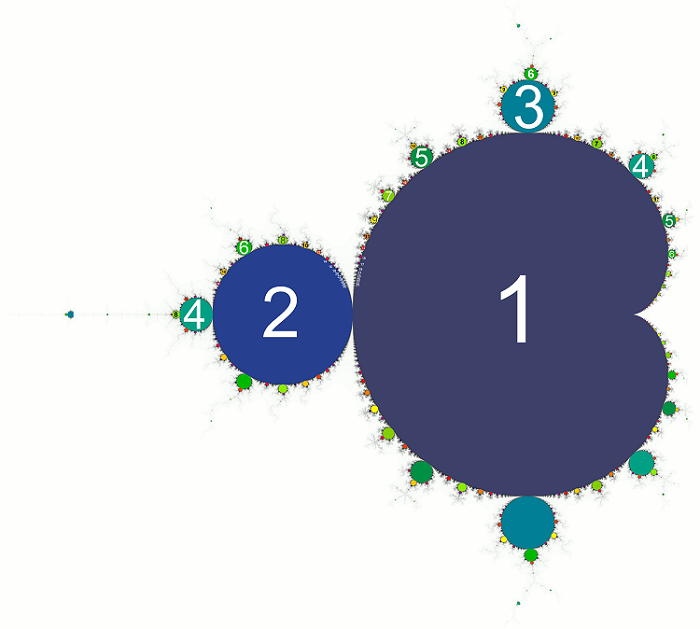

Die Werte in der Kardioide haben eine Folge mit Konvergenz zu genau einem Fixpunkt. Wenn man stattdessen einen Satelliten genauer betrachtet, hat dieser eine Periode in welcher die Fixpunkte sich nach n Zyklen wiederholen.  
Nehmen wir mal als Beispiel den Wert 0.1 + 0i, welcher in der Kardioide vorhanden ist. Die Folge von diesem Wert über die Iterationen läuft: 0,0.1,0.11,0.1121,0.11256641,... Daraus lässt sich erahnen, dass sie gegen etwa 0.112 Konvergiert. Genauso auch der Wert -0.25 + 0i, der auch in der Kardioide enthalten ist, konvergiert gegen genau einen Fixpunkt, der etwa 0.207 beträgt. Das kann man mit allen Werten in der Kardioide durchführen und bei allen dieser Werten wird man genau einen Fixpunkt finden (siehe Bild). Anders sieht es bei Werten aus, die kleiner als -0.75 + 0i sind, denn diese sind nicht mehr in dem "Hauptkörper" enthalten. Sehr anschaulich sieht man das bei dem Wert -1 + 0i, denn dort springt die Folge zwischen zwei Fixpunkten hin und her, welche bei 0 und -1 liegen. Wenn man noch weiter geht, beispielsweise -1.25 + 0i, dann springt die Folge zwischen 4 Fixpunkten, wie man es auch aus dem Bild entnehmen kann. Dabei ist der wechsel zwischen der Anzahl der Fixpunkte die Schnittstelle zwischen den Satelliten oder der Kardioide. 

## Beziehung untereinander
Tatsächlich lässt sich eine Beziehung zwischen der logistischen Gleichung, dem Feigenbaum-Diagramm, der Julia-Mengen und der Mandelbrot-Menge bilden. Von der logistischen Gleichung wissen wir ja, dass die Folge etwa bis zu einem r Wert von kleiner 3 konvergiert. Dieselbe Eigenschaft haben auch die Fixpunkte in der Mandelbrot-Menge innerhalb der Kardioide. Bei einem r Wert ab etwa 3 und größer springt die Folge zwischen zwei Werten, was ähnlich zu den Werten innerhalb der Satelliten auf der reelen Zahlenachse ist. Der Punkt an welcher die Nadel der Mandelbrot-Menge beginnt kann man gleichsetzen mit dem r Wert, an welcher die Folge in das Chaos übergeht. Später bei einem r Wert von um die 3.84 entsteht in dem Chaos wieder eine Folge, die man mit dem kleinen Mandelbrot-Modell bei dem Wert von etwa -1.74 + 0i erklären kann. Man spricht auch von der Intermittenz: kurze Phase, welche das chaotische Verhalten unterbricht.
Wenn man die Fixpunkte in ein Diagramm zeichnet, wobei die x-Achse die Werte des Parameters c entsprechen und auf der Y-Achse die dazugehörigen Fixpunkte einträgt, entsteht ein Diagramm welches man auch Bifurkationsdiagramm nennt.

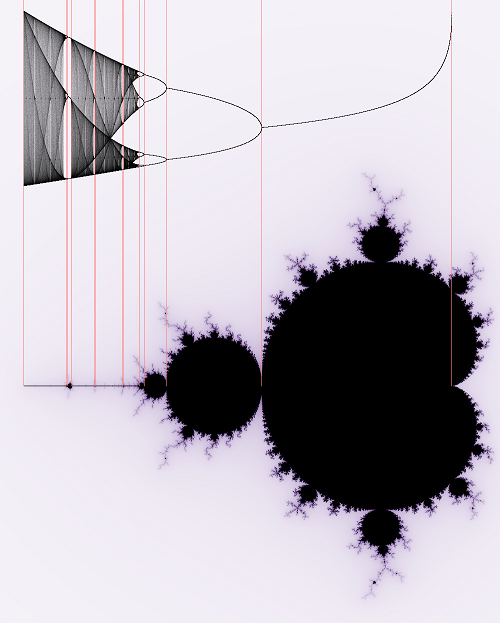

Wie man unschwer erkennen kann hat dieses Bifurkationsdiagramm eine sehr starke Ähnlichkeit zu dem Feigenbaum-Diagramm. Hier erkennt man, ab welchem Wert die Fixpunkte zu Oszillieren beginnen und das ist auch genau der Punkt, an welchem die "Einschnürrungen" der Satelliten zu sehen sind. Genauso sieht man auch schön, ab wann das Chaos entsteht und wann wieder das periodische Fenster (Intermittenz) erscheint.  
Auch die eingehens erwähnte Feigenbaum-Konstante ist in der Mandelbrot-Menge anzutreffen. Als Beispiel kann man die Satelliten an der Spitze der Kardioide nehmen. Je weiter man in den Punkt -1.4 + 0i geht erscheinen andauernd wiederholende Satelliten, die in die Nadel übergehen. Die Satelliten sind jedes mal um den Faktor der Feigenbaum-Konstanten kleiner als der vorige. Visuell kann man das schön am folgenden Gif entnehmen.

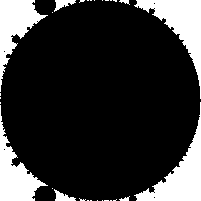

Das die Julia-Menge etwas mit der Mandelbrot-Menge gemein hat ist dagegen ziemlich offensichtlich. Beide verwenden dieselbe Iterationsvorschrift, jedoch behandeln sie die einzelnen Werte anders. Genauso bezieht sich der Formenreichtum der Mandelbrot-Menge aus den Julia-Mengen. Häufig ist es so, dass wenn man ein Wert aus der Mandelbrot Menge nimmt und die dazugehörige Julia-Menge berechnet, man eine ähnliche Form dort wiederfindet, wie wenn man den Punkt zu diesem Wert in der Mandelbrot-Menge vergrößert. Man kann grob sagen, dass die Mandelbrot-Menge eine veralgemeinerung der Julia-Mengen ist, denn ein Wert gehört zur Mandelbrot-Menge genau dann, wenn die dazugehörige Julia-Menge zusammenhängend ist. Daraus lässt sich eine weitere Definition der Mandelbrot-Menge herleiten:
<p style="text-align: center; font-size: 20px;">
<b> 𝕄 ≔ {c ∈ ℂ│ 𝕁<sub>c</sub> ist zusammenhängend} </b> </p>   

Um sich das visuell mal vor Augen zu halten kann man für grobe Punkte der Mandelbrot-Menge die jeweilige Julia-Menge berechnen und aneinanderreihen. Das daraus entstehende Bild lässt die Mandelbrotmenge erahnen, wie man im folgenden sieht.

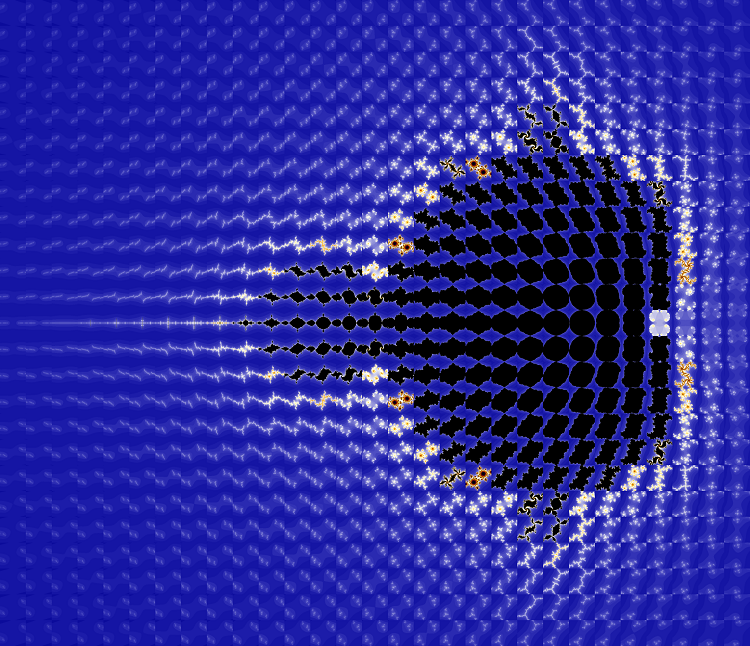

## Selbstähnlichkeit
Eine große Gemeinsamkeit haben die vorangegangenen Mengen und Diagrammen aber noch: Die Selbstähnlichkeit. Was ist die Selbstähnlichkeit? Selbstähnlich ist, wie der Name schon verlauten lässt, die Eigenschaft zu sich selbst ähnlich zu sein. Ein großes Beispiel sind dabei die Fraktale, welche wir in einem anderen Projekt bereits bearbeiten durften. Diese sind nämlich zu einem sehr hohen Grad selbstähnlich und zudem Skaleninvariant. Skaleninvarianz bedeutet die Situation, die unabhängig von der Skala nicht auszumachen ist, an welcher Stelle man sie antrifft. Das ist bei Fraktalen eben gegeben, weil diese aus unzählbar kleineren Varianten ihrer selbst bestehen. Benoît Mandelbrot hat den Begriff der Fraktale sehr stark geprägt und diese Form bekannt gemacht.  
Die Mandelbrot-Menge selbst ist Selbstähnlich, aber nicht exakt. Das heißt, dass sie zwar selbstähnliche Strukturen aufweist, aber nicht vollständig selbstähnlich ist, wie beispielsweise das Sierpinski-Dreieck, oder andere Fraktale. Selbstähnliche Strukturen sind hier, wie bereits erwähnt, die Satelliten, welche rund um der Menge zu finden sind, aber auch die Menge selbst, die man an vielen Stellen häufig wiederfindet. Im folgenden Bildausschnitt von *x = (-0.015, -0.005), y = (0.80, 0.81)* der Mandelbrot-Menge kann man beispielsweise sehr gut erkennen wie die kleineren Formen der Mandelbrot-Menge vorkommen.

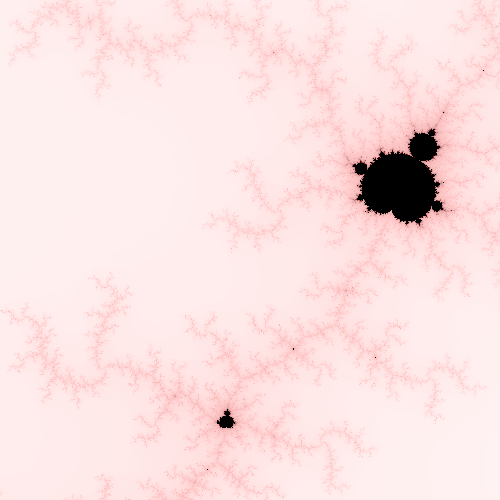

In [9]:
iterations = 1000
resolutionSize = 500
x = (-0.015, -0.005)
y = (0.80, 0.81)
image = mc_pil_plot(x, y, resolutionSize, resolutionSize, iterations, false, complex(0j), Colorizer.get_fades(iterations)["Rot"])

Was ist das besondere an der Selbstähnlichkeit, oder bessergesagt, warum ist diese so bekannt? Benoît Mandelbrot sah in der Welt ein Code, was andere Mathematiker vor ihm als Absonderlichkeit abgetan hatten. Er erkannte eine Beziehung zwischen Pflanzenmuster, Blutgefäße, Flussläufe, Berge, etc... Und das war eben die Selbstähnlichkeit. Die Natur verwendet an etlichen Stellen die Eigenschaft der Rekursion, der Wiederverwendung. Ein sehr bekanntes Beispiel ist die Blumenkohl Art der Romanesco. Auf ihrer Oberfläche lässt sich eindrucksvoll erkennen, wie die Natur ein Muster erschaffen hat, welches wie Fraktale kleinere Formen ihrerselbst in sich beinhaltet. Der Grund warum die Natur so viel Selbstähnlichkeit und Wiederverwendung verwendet sehen Naturforscher in der Regel der Sparsamkeit. Die besagt, dass wenn sich etwas bewährt, oder zumindest den geringsten Widerstand bietet, das so lange beibehalten wird, bis schlussendlich die Gegebenheiten sich verändern und daran angepasst werden muss.

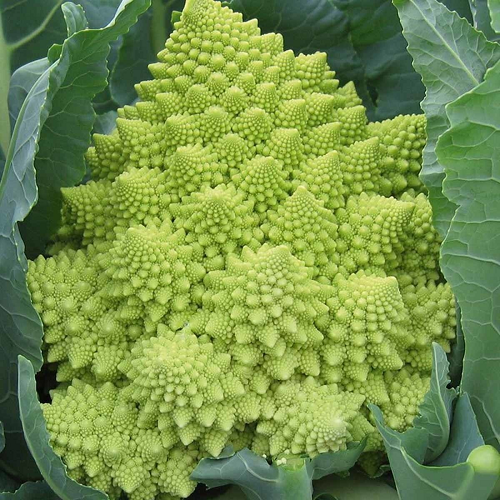

# Quellen
Logistische Gleichung:

- Die logistische Gleichung - ein Weg ins Chaos (Andreas Schmid, 2009, http://www.fraktalwelt.de/systeme/as_weg_ins_chaos.pdf)
- Modellierung natürlicher Prozesse und Optimierungsstrategien (Jens Kortus, Theoretische Physik TU Freiberg (https://tu-freiberg.de/sites/default/files/media/institut-fuer-theoretische-physik-10451/Lehre/Modelierung/modnatproz.pdf)
- Populationsmodelle (Philipp Jansche, 2008/09, https://www.mathi.uni-heidelberg.de/~thaeter/mathmod08/AusarbeitungPopulationsmodelle.pdf)
- Die logistische Gleichung als ein Beispiel für chaotische Prozesse in der Physik (Nils Grzech, 2012, https://docplayer.org/18693722-Die-logistische-gleichung-als-ein-beispiel-fuer-chaotische-prozesse-in-der-physik.html)

Feigenbaum-Diagramm:

- Feigenbaum-Konstante https://physik.cosmos-indirekt.de/Physik-Schule/Feigenbaum-Konstante, https://www.heise.de/newsticker/meldung/Zahlen-bitte-Die-Feigenbaum-Konstante-beschreibt-Ordnung-im-Chaos-4141733.html
- Diagramm erzeugen http://walter.bislins.ch/blog/index.asp?page=Feigenbaum%2DDiagramm+erzeugen+und+analysieren

Sensitivität:

- Sensitivität: https://www.uni-muenster.de/AMM/num/Vorlesungen/Modellierung_SS08/modellierung08/Kapitel2.pdf
- Chaosforschung: https://physik.cosmos-indirekt.de/Physik-Schule/Chaosforschung
- Schmetterlingseffekt:
    - https://www.br.de/wissen/edward-lorenz-meteorologe-schmetterlingseffekt-chaostheorie-100.html 
    - https://physik.cosmos-indirekt.de/Physik-Schule/Schmetterlingseffekt
    
Julia-Mengen:

- Möglichkeiten der Darstellung von Julia-Mengen und Apfelmännchen (Lukas von Stumberg, 2011, https://www.hans-riegel-fachpreise.com/fileadmin/hans-riegel-fachpreise/Module/ausgezeichnete-arbeiten/hans-riegel-fachpreise-seminararbeit-vwa-2012-von-stumberg.pdf)
- Fraktale Geometrie: Julia Mengen (Gunnar Völkel, 2007, http://www.mathematik.uni-ulm.de/stochastik/lehre/ws06_07/seminar_fraktale/ausarbeitung_voelkel.pdf und http://www.mathematik.uni-ulm.de/stochastik/lehre/ws06_07/seminar_fraktale/voelkel.pdf)

Mandelbrot und Selbstähnlichkeit:

- Mandelbrot-Menge - Die Mathematik hinter dem Apfelmännchen:  
https://www.yumpu.com/de/document/view/2018556/mandelbrot-menge-fit-rosasgasse

- The dark side of the Mandelbrot set / Mathologer:  
https://www.youtube.com/watch?v=9gk_8mQuerg

- Die Mandelbrotmenge / Uni-Leipzig:  
https://www.informatik.uni-leipzig.de/~meiler/Schuelerseiten.dir/DPlotzki/html/mndlbrt.htm

- Chaos und Fraktale:  
http://rene.rondot.de/facharbeit/facharbeit-Title.html

- Beziehung zwischen log, julia, Mandel:  
https://www.heise.de/newsticker/meldung/Zahlen-bitte-Die-Feigenbaum-Konstante-beschreibt-Ordnung-im-Chaos-4141733.html

- Woher kommt der name Apfelmännchen:  
https://fraktalwelten.wordpress.com/2012/10/02/woher-kommt-der-name-apfelmannchen/

- Bilder:  
https://upload.wikimedia.org/wikipedia/commons/0/0e/Mandelbrot_Set_%E2%80%93_Periodicities_coloured.png  
https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Verhulst-Mandelbrot-Bifurcation.jpg/800px-Verhulst-Mandelbrot-Bifurcation.jpg
https://heise.cloudimg.io/cdn/n/n/_www-heise-de_/imgs/18/2/4/8/5/6/4/0/Mandelbrot_zoom-9f91045f7c2a59fe.gif  
https://upload.wikimedia.org/wikipedia/commons/8/8e/725_Julia_sets.png  
https://www.tomgarten.de/media/catalog/product/cache/1/image/1200x/9df78eab33525d08d6e5fb8d27136e95/1/9/192374/Blumenkohl-Romanesco-Veronica-,-F1-Bio-Samen_Portion-Samen_(192374)-30.jpg

# Kollaboration
Da unser Thema sechs Unterthemen und unser Team drei Teilnehmer umfasst, hat sich jeder Teilnehmer mit primär zwei Themen beschäftigt.  
Natürlich haben die sechs Themen viele Schnittpunkte gemein und die Trennlinie ist daher nicht scharf zu ziehen, aber grob haben wir die Themen folgendermaßen aufgeteilt:
- Michael Rudyj: Feigenbaum-Diagramm & Sensitivität  
- Cedric Holzer: Logistische Gleichung & Julia-Mengen  
- Aron Winter: Mandelbrotmenge & Apfelmännchen und Selbstähnlichkeit  